# 作業 : (Kaggle)房價預測

# [作業目標]
- 試著模仿範例寫法, 在房價預測中, 觀察去除離群值的影響

# [作業重點]
- 觀察將極端值以上下限值取代, 對於分布與迴歸分數的影響 (In[5], Out[5])
- 觀察將極端值資料直接刪除, 對於分布與迴歸分數的影響 (In[6], Out[6])

In [58]:
# 做完特徵工程前的所有準備 (與前範例相同)
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [83]:
data_path = '../Part02/'
df_train = pd.read_csv(data_path + 'house_train.csv.gz')

train_Y = np.log1p(df_train['SalePrice'])
df = df_train.drop(['Id', 'SalePrice'] , axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [84]:
#只取 int64, float64 兩種數值型欄位, 存於 num_features 中
num_features = []
for dtype, feature in zip(df.dtypes, df.columns):
    if dtype == 'float64' or dtype == 'int64':
        num_features.append(feature)
print(f'{len(num_features)} Numeric Features : {num_features}\n')

36 Numeric Features : ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']



In [85]:
# 削減文字型欄位, 只剩數值型欄位
df = df[num_features]
df = df.fillna(-1)
MMEncoder = MinMaxScaler()
train_num = train_Y.shape[0]
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008


# 作業1
* 試著限制 '1樓地板面積(平方英尺)' (1stFlrSF) 欄位的上下限, 看看能否再進一步提高分數?

In [86]:
# 顯示 1stFlrSF 與目標值的散佈圖
import seaborn as sns
import matplotlib.pyplot as plt

(array([  2.,  23., 104., 391., 436., 323., 159.,  18.,   3.,   1.]),
 array([ 8.38370429,  8.76493259,  9.14616089,  9.52738919,  9.90861749,
        10.2898458 , 10.6710741 , 11.0523024 , 11.4335307 , 11.814759  ,
        12.1959873 ]),
 <a list of 10 Patch objects>)

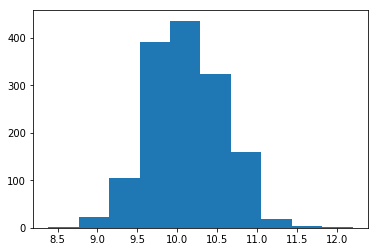

In [87]:
plt.hist(np.log2(df['1stFlrSF']))

/home/kuo/miniconda3/envs/venv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


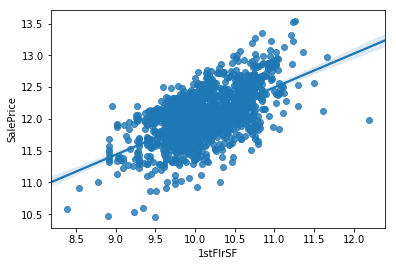

In [88]:
sns.regplot(x = np.log2(df['1stFlrSF'])[:train_num], y=train_Y)
plt.show()

In [89]:
# 做線性迴歸, 觀察分數
train_X = MMEncoder.fit_transform( np.log2(df[['1stFlrSF']]))
# train_X = MMEncoder.fit_transform( df[['1stFlrSF']])

estimator = LinearRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.3663010690391623

In [90]:
df['1stFlrSF'].describe()

count    1460.000000
mean     1162.626712
std       386.587738
min       334.000000
25%       882.000000
50%      1087.000000
75%      1391.250000
max      4692.000000
Name: 1stFlrSF, dtype: float64

In [91]:
1.5*(1391-882)

763.5

In [92]:
# 將 1stFlrSF 限制在你覺得適合的範圍內, 調整離群值
df['1stFlrSF'].clip((882-763),(1391+763)).describe()

count    1460.000000
mean     1157.002740
std       362.540571
min       334.000000
25%       882.000000
50%      1087.000000
75%      1391.250000
max      2154.000000
Name: 1stFlrSF, dtype: float64

In [101]:
# 做線性迴歸, 觀察分數
train_X1 = MMEncoder.fit_transform(np.log2(df[['1stFlrSF']]))
train_X2 = MMEncoder.fit_transform(df[['1stFlrSF']].clip((882-763),(1391+763)))
train_X3 = MMEncoder.fit_transform((df[['1stFlrSF']].clip((882-763),(3000))))
train_X4 = MMEncoder.fit_transform(np.log2(df[['1stFlrSF']].clip((882-763),(1391+763))))
train_X5 = MMEncoder.fit_transform((df[['1stFlrSF']]))
for train_X in [train_X1, train_X2, train_X3, train_X4, train_X5]:
    estimator = LinearRegression()
    print(cross_val_score(estimator, train_X, train_Y, cv=5).mean())

0.3663010690391623
0.3765784703229778
0.36848001467644903
0.3690181838545263
0.34857835866349257


/home/kuo/miniconda3/envs/venv/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/home/kuo/miniconda3/envs/venv/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/home/kuo/miniconda3/envs/venv/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


# 作業2
* 續前題, 去除離群值有兩類方式 :  捨棄離群值(刪除離群的資料) 以及調整離群值,  
請試著用同樣的上下限, 改為 '捨棄離群值' 的方法, 看看結果會變好還是變差? 並試著解釋原因。

In [70]:
# 將 1stFlrSF 限制在你覺得適合的範圍內, 捨棄離群值

# df[['1stFlrSF']]
train_Y[df['1stFlrSF'] < 2154]

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
5       11.870607
6       12.634606
7       12.206078
8       11.774528
9       11.678448
10      11.771444
11      12.751303
12      11.877576
13      12.540761
14      11.964007
15      11.790565
16      11.911708
17      11.407576
18      11.976666
19      11.842236
20      12.692506
21      11.845110
22      12.345839
23      11.774528
24      11.944714
25      12.454108
26      11.811555
27      12.631344
28      12.242891
29      11.134604
          ...    
1430    12.165985
1431    11.875838
1432    11.074436
1433    12.136192
1434    11.982935
1435    12.066816
1436    11.699413
1437    12.885673
1438    11.916395
1439    12.190964
1440    12.160034
1441    11.913720
1442    12.644331
1443    11.703554
1444    12.098493
1445    11.767575
1446    11.969724
1447    12.388398
1448    11.626263
1449    11.429555
1450    11.820418
1451    12.567555
1452    11.884496
1453    11.344519
1454    12

In [71]:
# 做線性迴歸, 觀察分數
score = []
for i in range(1, 1000, 100):
    train_X = MMEncoder.fit_transform(df[['1stFlrSF']][(i<df['1stFlrSF']) & (df['1stFlrSF'] < 2154)])
    estimator = LinearRegression()
    s = cross_val_score(estimator, train_X, train_Y[(i<df['1stFlrSF']) & (df['1stFlrSF'] < 2154)], cv=5).mean()
    score.append(s)

/home/kuo/miniconda3/envs/venv/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/home/kuo/miniconda3/envs/venv/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/home/kuo/miniconda3/envs/venv/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/home/kuo/miniconda3/envs/venv/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/home/kuo/miniconda3/envs/venv/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConver

In [72]:
score

[0.3586921840612514,
 0.3586921840612514,
 0.3586921840612514,
 0.3586921840612514,
 0.35467038224653447,
 0.3449616206403808,
 0.3323509045597509,
 0.3155686437180828,
 0.31441742467029216,
 0.2925648771190098]

/home/kuo/miniconda3/envs/venv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


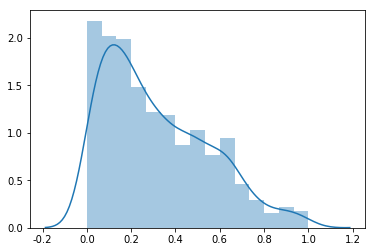

In [73]:
sns.distplot(train_X)

In [74]:
len(df['1stFlrSF']), 
(df['1stFlrSF'] < 2154).mean()


0.9863013698630136

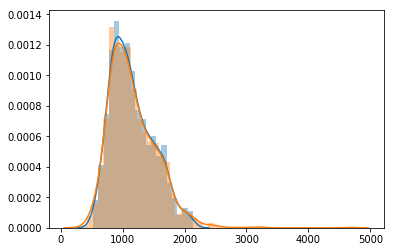

In [75]:
sns.distplot(df[['1stFlrSF']][(500<df['1stFlrSF']) & (df['1stFlrSF'] < 2154)])
sns.distplot(df[['1stFlrSF']])


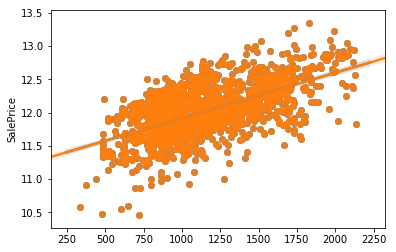

In [78]:
# sns.regplot(x = df[['1stFlrSF']][df['1stFlrSF'] < 2154][:train_num], y=train_Y[df['1stFlrSF'] < 2154])
sns.regplot(x = df[['1stFlrSF']][(119 < df['1stFlrSF']) & (df['1stFlrSF'] < 2154)][:train_num], y=train_Y[(119<df['1stFlrSF']) & (df['1stFlrSF'] < 2154)])


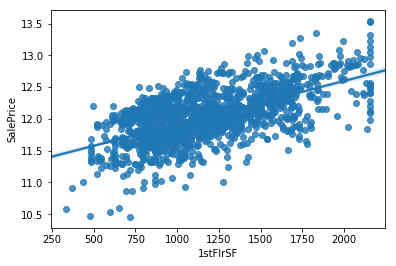

In [80]:

sns.regplot(x = df['1stFlrSF'].clip((882-763),(1391+763))[:train_num], y=train_Y)


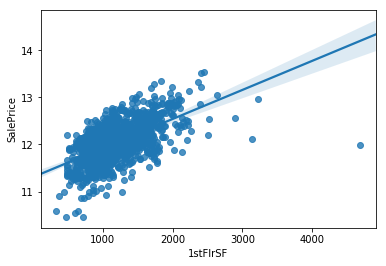

In [28]:
sns.regplot(x = df['1stFlrSF'][:train_num], y=train_Y)


In [81]:
train_Y[(119<df['1stFlrSF']) & (df['1stFlrSF'] < 2154)].describe()

count    1440.000000
mean       12.014859
std         0.390563
min        10.460271
25%        11.771444
50%        11.994586
75%        12.264346
max        13.345509
Name: SalePrice, dtype: float64

In [50]:
train_Y.describe()

count    1460.000000
mean       12.024057
std         0.399449
min        10.460271
25%        11.775105
50%        12.001512
75%        12.273736
max        13.534474
Name: SalePrice, dtype: float64

In [ ]:
# 丟棄效果變差了，可能是相對高價位的樣本少了，模型對於高單價的預測效果就差了